# ML_unsupervised_Sprint8

## Grouping algorithm exercises.

#### - Exercise 1
Download the attached dataset, of records of Facebook posts about Thailand, and rank the different records using the K-means algorithm.

important

Keep in mind that you will need to prepare the dataset beforehand.

#### - Exercise 2
Sort the different records using the hierarchical clustering algorithm.

#### - Exercise 3
Calculate the clustering performance using a parameter such as silhouette.


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import scipy
from scipy import stats
import math

In [2]:
df = pd.read_csv('Publicacions Facebook Thailandia.csv', sep=',')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## Dataset info.

Features:

-status_id: id of the status published.

-status_type: this refers to the type of facebook element to analyse: photo, video, status or link.

-status_published month/day/year and hour the status was published.

-num_reactions: number of reactions that the status got: it is the addition of the likes, loves, wows, hahas, sads and angrys.

-num_comments: number of comments that the status got.

-num_shares: number of shares that the status got.

-num_likes: number of likes that the status got.

-num_loves: number of loves that the status got.

-num_wows: number of wows that the status got.

-num_hahas: number of hahas that the status got.

-num_sads: number of sads that the status got.

-num_angrys: number of angrys that the status got.

-Column1/2/3/4: this columns have no data or info.

In [3]:
#datatype check
df.dtypes

status_id            object
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object

In [4]:
df.info

<bound method DataFrame.info of                               status_id status_type status_published  \
0      246675545449582_1649696485147474       video   4/22/2018 6:00   
1      246675545449582_1649426988507757       photo  4/21/2018 22:45   
2      246675545449582_1648730588577397       video   4/21/2018 6:17   
3      246675545449582_1648576705259452       photo   4/21/2018 2:29   
4      246675545449582_1645700502213739       photo   4/18/2018 3:22   
...                                 ...         ...              ...   
7045  1050855161656896_1061863470556065       photo   9/24/2016 2:58   
7046  1050855161656896_1061334757275603       photo  9/23/2016 11:19   
7047  1050855161656896_1060126464063099       photo  9/21/2016 23:03   
7048  1050855161656896_1058663487542730       photo   9/20/2016 0:43   
7049  1050855161656896_1050858841656528       photo  9/10/2016 10:30   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0               529   

In [5]:
for col in df.columns:
    print(col)

status_id
status_type
status_published
num_reactions
num_comments
num_shares
num_likes
num_loves
num_wows
num_hahas
num_sads
num_angrys
Column1
Column2
Column3
Column4


In [6]:
df['status_published'] = pd.to_datetime(df['status_published'])
df['hour'] = df['status_published'].dt.hour
df['date'] = df['status_published'].dt.date
df['date'] = pd.to_datetime(df['date'])
df.drop(['status_published'], axis=1, inplace=True)

In [7]:
#datatype check
df.dtypes

status_id                object
status_type              object
num_reactions             int64
num_comments              int64
num_shares                int64
num_likes                 int64
num_loves                 int64
num_wows                  int64
num_hahas                 int64
num_sads                  int64
num_angrys                int64
Column1                 float64
Column2                 float64
Column3                 float64
Column4                 float64
hour                      int64
date             datetime64[ns]
dtype: object

In [8]:
# Remove first 3 columns and last 4 for df visualization:
df_for_visualizations = df.drop(['status_id','date','status_type','Column1','hour','Column2','Column3','Column4'], axis=1)

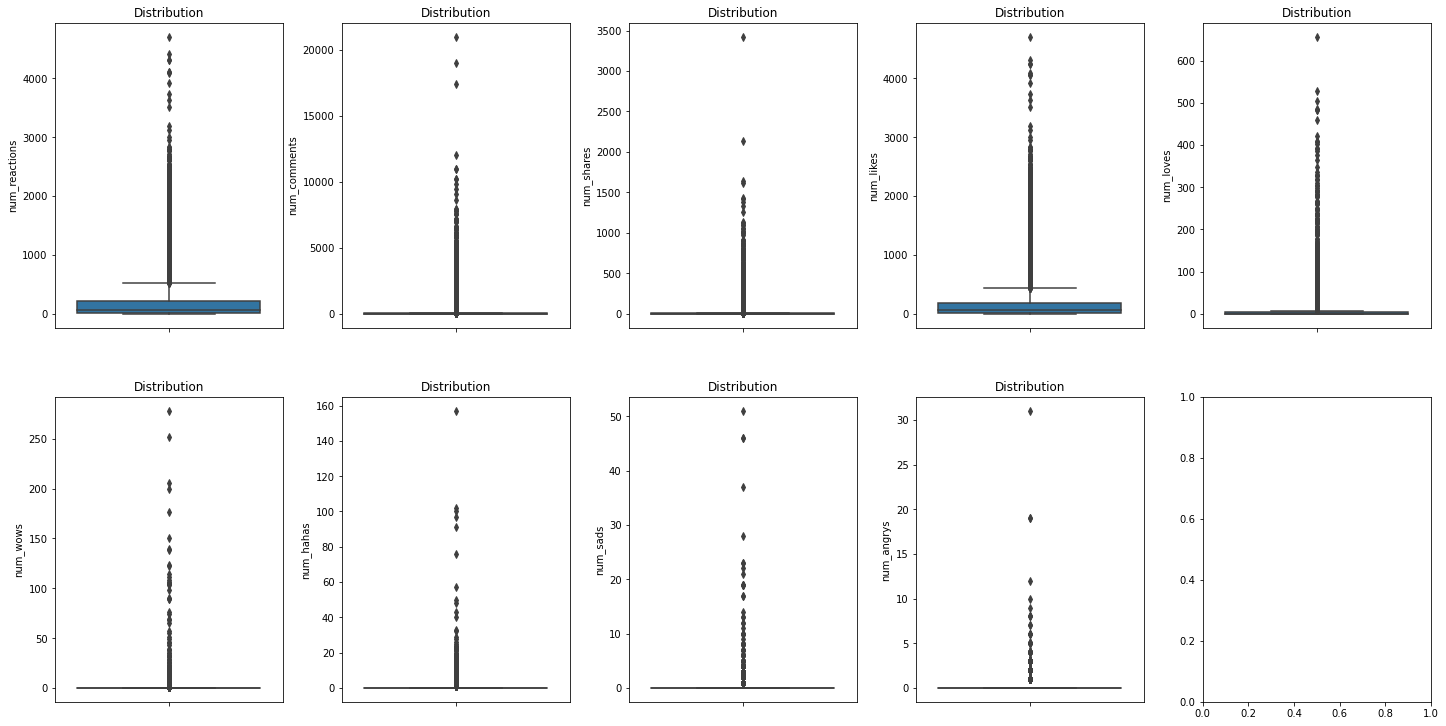

In [9]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_for_visualizations.items():
    sns.boxplot(y=k, data=df, ax=axs[index]).set(title='Distribution')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [10]:
import warnings
warnings.filterwarnings('ignore')

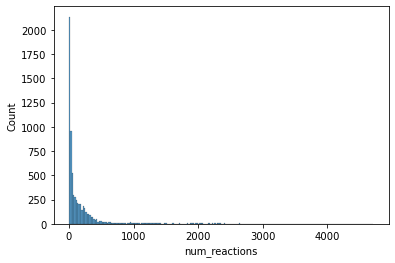

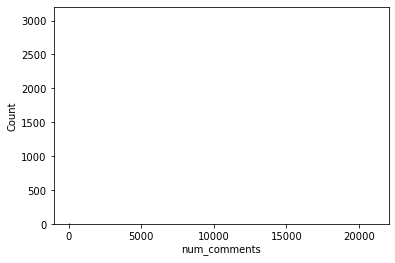

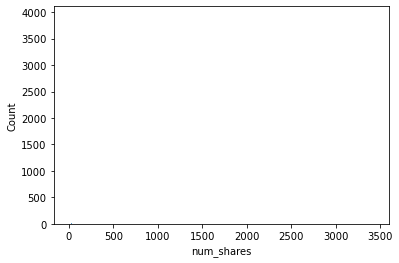

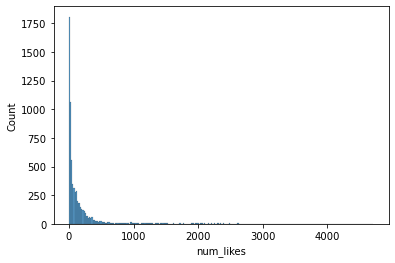

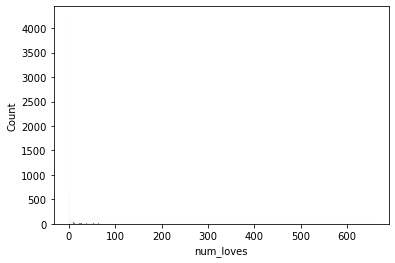

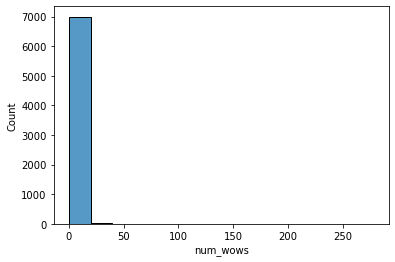

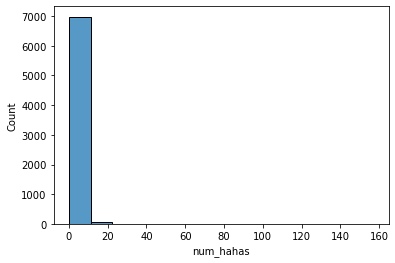

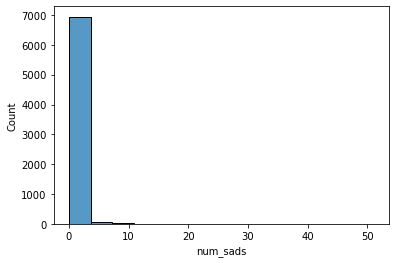

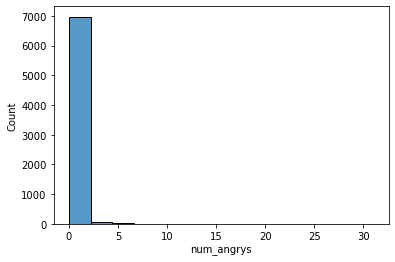

In [11]:
cols= ['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads',
'num_angrys']
for col in cols:
    sns.histplot(df_for_visualizations[col])
    plt.show()

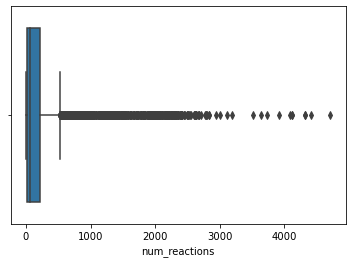

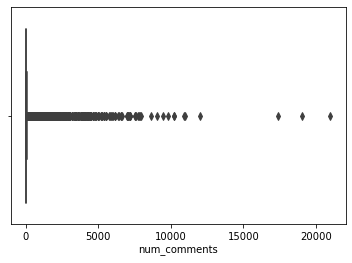

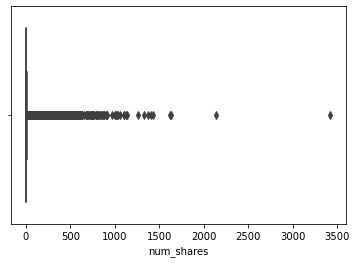

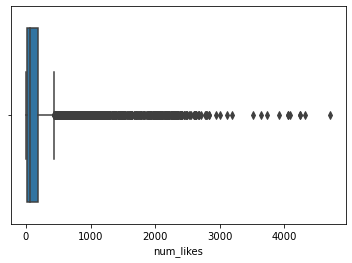

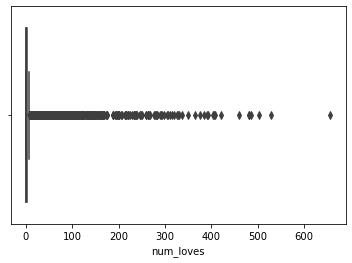

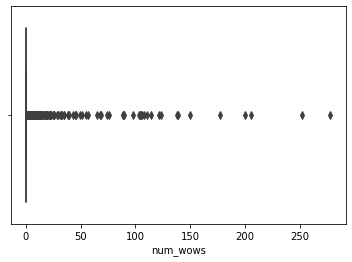

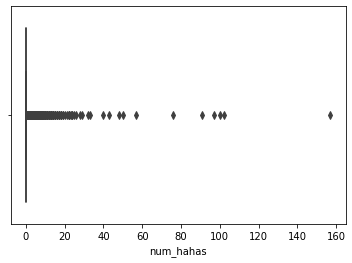

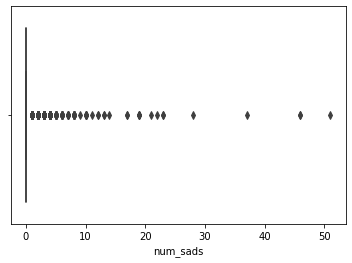

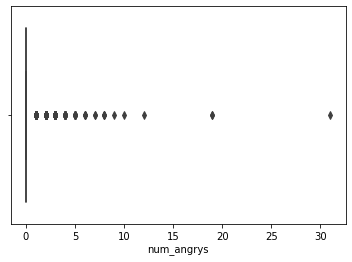

In [12]:
for col in cols:
    sns.boxplot(df_for_visualizations[col])
    plt.show()


In [13]:
print('Null hypothesis: H0 : P = x -> Normal distribution')
print('Alternative hypothesis Ha : P /= x -> Not normal distribiuted')
print('--------------------------------------------------------')
for i in df_for_visualizations.columns:
    shapiro_test = stats.shapiro(df[i])
    print('The variable ', i, "with p-value of ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.03: #Iset the P-value to 0.03 (normally 0.05), for gain more flexibility with the result
        print('Probably normally distributed')
    else:
        print("Probably NOT normally distributed")

Null hypothesis: H0 : P = x -> Normal distribution
Alternative hypothesis Ha : P /= x -> Not normal distribiuted
--------------------------------------------------------
The variable  num_reactions with p-value of  0.0
Probably NOT normally distributed
The variable  num_comments with p-value of  0.0
Probably NOT normally distributed
The variable  num_shares with p-value of  0.0
Probably NOT normally distributed
The variable  num_likes with p-value of  0.0
Probably NOT normally distributed
The variable  num_loves with p-value of  0.0
Probably NOT normally distributed
The variable  num_wows with p-value of  0.0
Probably NOT normally distributed
The variable  num_hahas with p-value of  0.0
Probably NOT normally distributed
The variable  num_sads with p-value of  0.0
Probably NOT normally distributed
The variable  num_angrys with p-value of  0.0
Probably NOT normally distributed


We can observe that all the variables are not normally distributed.

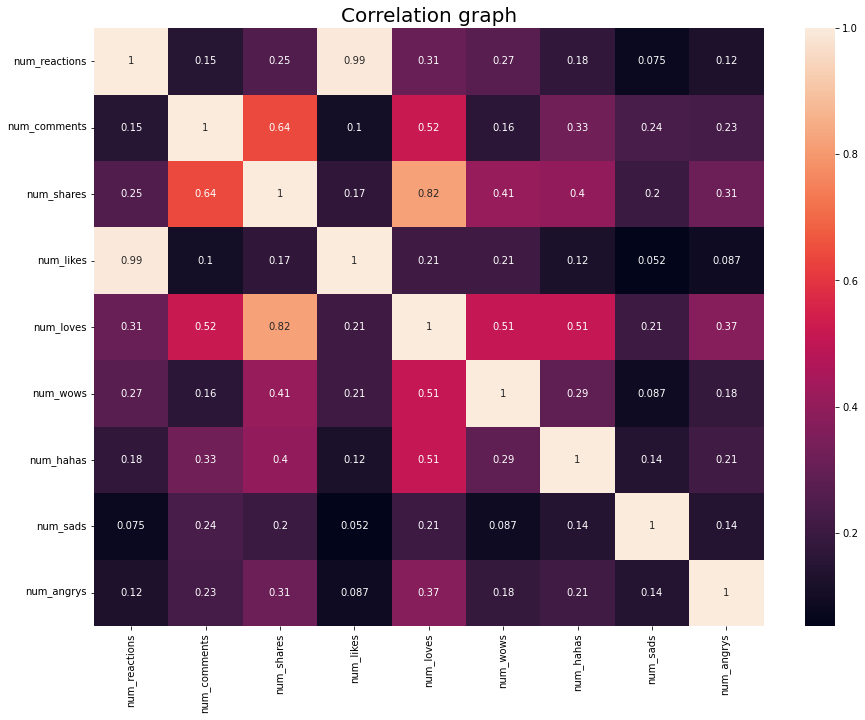

In [14]:
corr = df_for_visualizations.corr()
plt.figure(figsize=(15,11))
plt.title('Correlation graph', fontsize=20)
sns.heatmap(corr, annot=True) #annot puts the number of the correlation.
plt.show()

In the dataset we can see 7050 rows so both 'status_id variable' and 'status_published' variable are not relevant since they are also a approximately a unique identifier for each of the instances.

## Convert categorical variable into integers

In [15]:
#Declare feature vector and target variable

y = df['status_type']

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['status_type'] = le.fit_transform(df['status_type'])

y = le.transform(y)

In [17]:
df['status_type'].value_counts()

1    4288
3    2334
2     365
0      63
Name: status_type, dtype: int64

#### Let explore the cathegorical data 'status_type':

In [18]:
#Visualize the legend:

df_status_type = {1:"Photo",2:"Video",3:"Status",0:"Link"}
pd.DataFrame(df_status_type.items(), columns=['Index', 'status_type'])

,Index,status_type
0,1,Photo
1,2,Video
2,3,Status
3,0,Link


#### Explore 'status_id variable' and 'status_published' variable:

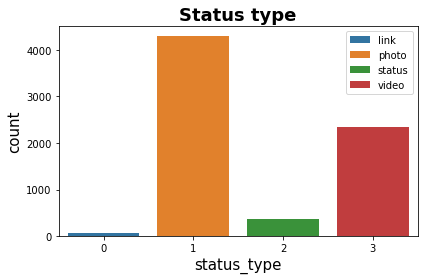

In [19]:
ax = sns.countplot(x='status_type', hue='status_type', dodge=False, data=df)
ax.set_title('Status type', fontsize=18, fontweight='bold', color='black')
ax.set_xlabel('status_type', fontsize=15, color='black')
ax.set_ylabel('count', fontsize=15, color='black')
ax.legend(labels = ['link', 'photo', 'status', 'video'])


plt.tight_layout()
plt.show()

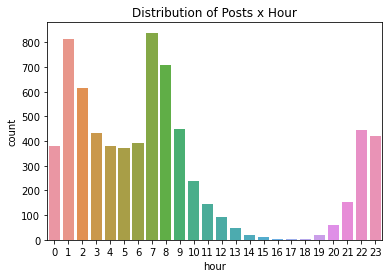

In [20]:
# Hour distribution:

pl = sns.countplot(x=df["hour"])
pl.set_title("Distribution of Posts x Hour")
plt.show()

Let see how looks like our final Dataframe we will use in the next steps:

## Preprocessing

In [21]:
df['Positive_reactions'] = df.apply(lambda row: row.num_likes + row.num_loves + row.num_wows, axis=1)
df['Negative_reactions'] = df.apply(lambda row: row.num_sads + row.num_angrys, axis=1)
df['Neutral_reactions'] = df['num_hahas']
df.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,hour,date,Positive_reactions,Negative_reactions,Neutral_reactions
0,246675545449582_1649696485147474,3,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN,6,2018-04-22,527,1,1
1,246675545449582_1649426988507757,1,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN,22,2018-04-21,150,0,0
2,246675545449582_1648730588577397,3,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN,6,2018-04-21,226,0,1
3,246675545449582_1648576705259452,1,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN,2,2018-04-21,111,0,0
4,246675545449582_1645700502213739,1,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN,3,2018-04-18,213,0,0


In [22]:
df_2 = df.drop(['Column1','Column2','Column3','Column4','date','status_id','num_likes','num_loves','num_wows',
       'num_sads', 'num_angrys','num_hahas','hour'], axis=1)
df_2.head()

,status_type,num_reactions,num_comments,num_shares,Positive_reactions,Negative_reactions,Neutral_reactions
0,3,529,512,262,527,1,1
1,1,150,0,0,150,0,0
2,3,227,236,57,226,0,1
3,1,111,0,0,111,0,0
4,1,213,0,0,213,0,0


In [23]:
new_cols = ['status_type','num_reactions','num_comments','num_shares', 'Positive_reactions','Negative_reactions'
        ,'Neutral_reactions']
#df_2=df_2[new_cols]
#or
df_2=df_2.reindex(columns=new_cols)
df_2.head()

,status_type,num_reactions,num_comments,num_shares,Positive_reactions,Negative_reactions,Neutral_reactions
0,3,529,512,262,527,1,1
1,1,150,0,0,150,0,0
2,3,227,236,57,226,0,1
3,1,111,0,0,111,0,0
4,1,213,0,0,213,0,0


#### Checking for null values:

In [24]:
df_2.isnull().values.any()

False

In [25]:
df_2.isna().values.any()

False

From the previusly visualizatios we can observe that all the variables contains outliers, so let apply Robust Scaler. It removes the median and scales the data according to the quantile range.

In [26]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [27]:
scalerRob = preprocessing.RobustScaler().fit(df_for_visualizations[cols])
df_for_visualizations[cols] = scalerRob.transform(df_for_visualizations[cols])

### Let visualize the new processed variables:

<Figure size 432x288 with 0 Axes>

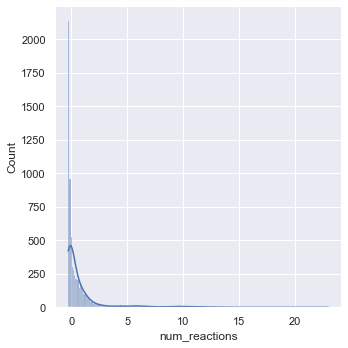

<Figure size 576x360 with 0 Axes>

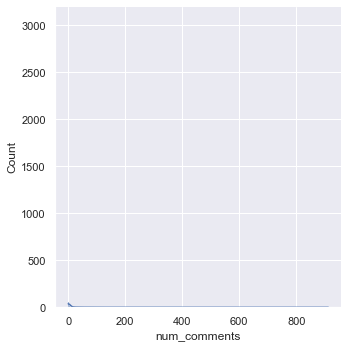

<Figure size 576x360 with 0 Axes>

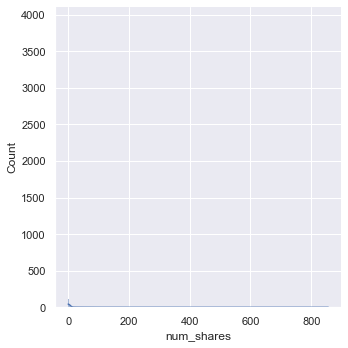

<Figure size 576x360 with 0 Axes>

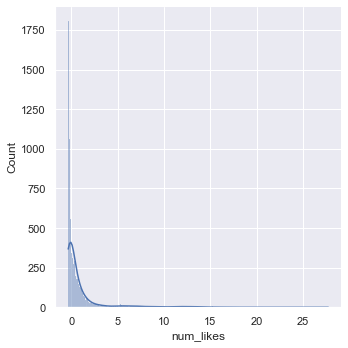

<Figure size 576x360 with 0 Axes>

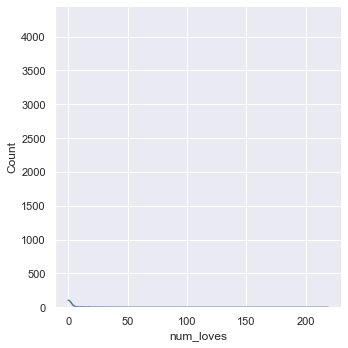

<Figure size 576x360 with 0 Axes>

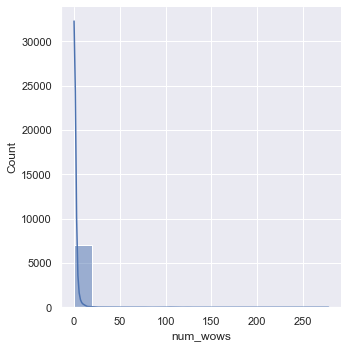

<Figure size 576x360 with 0 Axes>

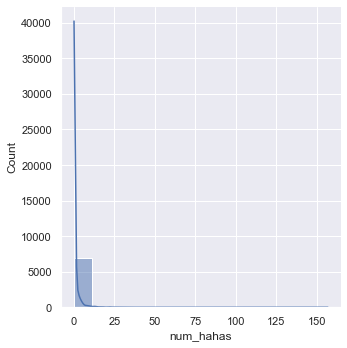

<Figure size 576x360 with 0 Axes>

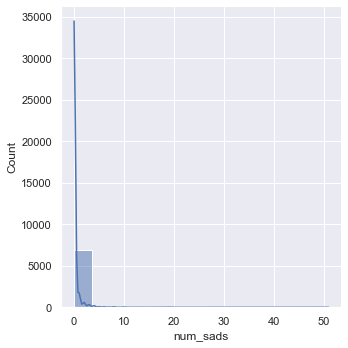

<Figure size 576x360 with 0 Axes>

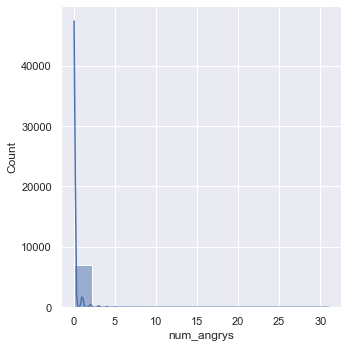

In [28]:
for i in df_for_visualizations.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    sns.displot(data=df_for_visualizations, x = df_for_visualizations[i], kde= True)

### PCA

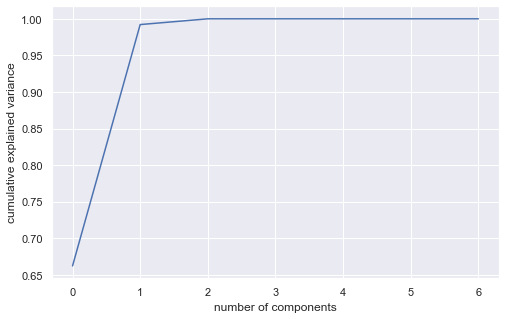

In [29]:
from sklearn.decomposition import PCA

pca = PCA().fit(df_2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [32]:
pca = PCA(n_components=1)
pca.fit(df_2)
df_pca = pd.DataFrame(pca.transform(df_2), columns=['pca'], index=df.index)
df_pca.head()

,pca
0,393.598581
1,-246.428009
2,11.983209
3,-258.572237
4,-226.810411


In [33]:
print(df_pca.shape)



(7050, 1)


### Chhosing the best number of clausters clusters using Silhouette and the Elbow Method.

In [34]:
from sklearn import metrics
from sklearn.cluster import KMeans
Knumber = []
CHnumber = []

range_n_clusters = list(range(2,6))

for n_clusters in range_n_clusters:
    Knumber.append(n_clusters)
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_2)
    centers = clusterer.cluster_centers_

    score = metrics.silhouette_score(df_2, preds)
    CHnumber.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.8717778408313123)
For n_clusters = 3, silhouette score is 0.8130581272316431)
For n_clusters = 4, silhouette score is 0.8180020781296973)
For n_clusters = 5, silhouette score is 0.7760275668084747)


Text(0, 0.5, 'Calinski-Harabasz Index')

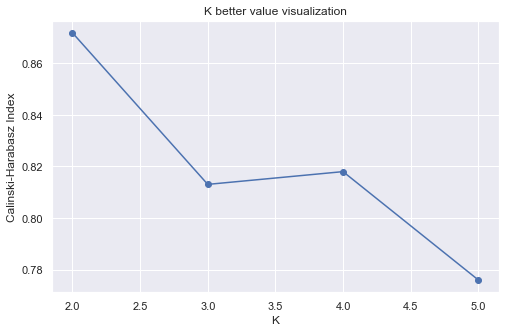

In [35]:
plt.plot(Knumber,CHnumber,marker='o')
plt.title('K better value visualization')
plt.xlabel('K')
plt.ylabel('Calinski-Harabasz Index')

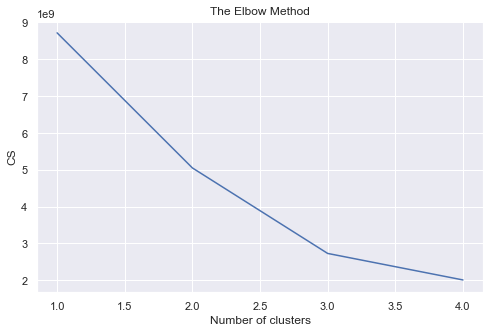

In [36]:
from sklearn.cluster import KMeans
cs = []
for i in range(1,5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_2)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 5), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

Looking at the above viasualization and the objectives of this studio, I decide to moove farward using 3 clusters for the classification.

### Models:

In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0) 

kmeans.fit(df_pca)

labels = kmeans.labels_

In [42]:
kmeans.cluster_centers_


array([[-169.36646162],
       [1873.77544648],
       [7207.44972618]])

In [43]:
print(pca.explained_variance_)

[818588.23511368]


The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster centroids.

In [44]:
kmeans.inertia_

1250836696.2717352

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia. The lower values of inertia are better and zero is optimal. 

We can see that the model has very high inertia. So, this is not a good model fit to the data.

In [45]:
prediction = kmeans.predict(df_pca)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [46]:
df_2['Predicted clusters K-M'] = prediction
df_2['Predicted clusters K-M']=kmeans.labels_
df_2.head()

,status_type,num_reactions,num_comments,num_shares,Positive_reactions,Negative_reactions,Neutral_reactions,Predicted clusters K-M
0,3,529,512,262,527,1,1,0
1,1,150,0,0,150,0,0,0
2,3,227,236,57,226,0,1,0
3,1,111,0,0,111,0,0,0
4,1,213,0,0,213,0,0,0


In [47]:
from sklearn.metrics import silhouette_score

num_silhouette1 = silhouette_score(df_pca, kmeans.labels_).round(1)

print("Silhouette score for numerical clusters:", num_silhouette1)

Silhouette score for numerical clusters: 0.9


### Visualization of each feature distribution per cluster:

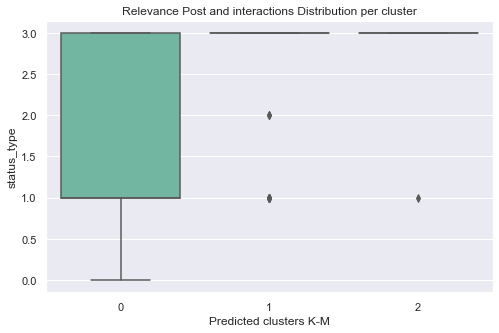

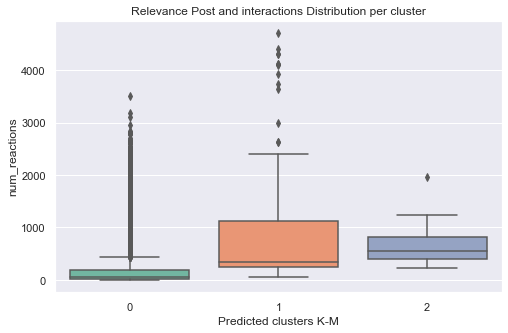

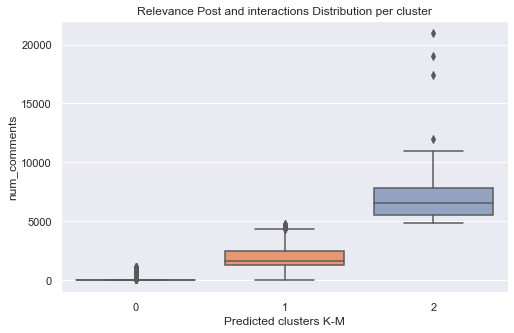

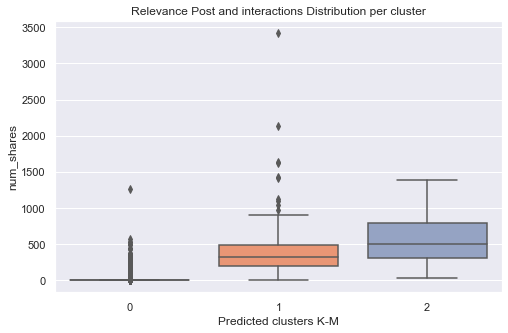

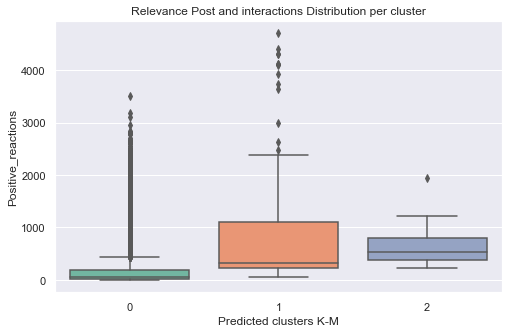

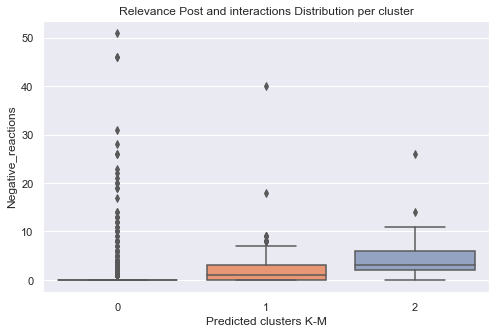

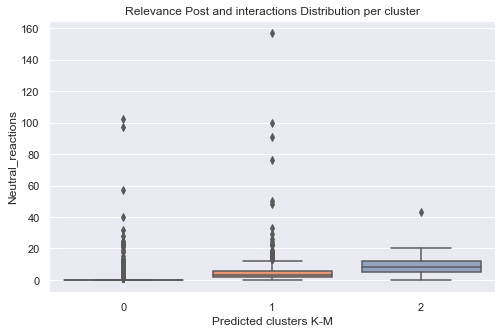

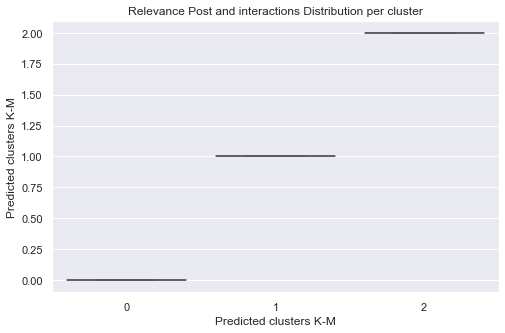

In [48]:
for i in df_2:
    sns.boxplot(data = df_2, y = i, x = "Predicted clusters K-M", palette = "Set2")
    plt.title("Relevance Post and interactions Distribution per cluster".format(i))
    plt.show()

From the visualization we can apreciate that it is possible to visualize 3 differents categories based on the relevance of the different publications tracked in the database.

### Hierarchy model:

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10, 7))  
plt.title("Dendrogram")  
shc.dendrogram(shc.linkage(df_pca, method = "ward"))
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")  
agglo.fit_predict(df_pca)

In [ ]:
df_pca["Predicted clusters hierarchy"] = agglo.labels_
df_pca

In [ ]:
df_2['Predicted clusters hierarchy']= agglo.labels_
df_2.head()

In [ ]:
for i in df_2:
    sns.boxplot(data = df_2, y = i, x = "Predicted clusters hierarchy", palette = "Set2")
    plt.title("Relevance Post and interactions Distribution per cluster".format(i))
    plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

num_silhouette2 = silhouette_score(df_pca, agglo.labels_).round(2)

print("Silhouette score for numerical clusters:", num_silhouette2)

### References: 

https://medium.com/analytics-vidhya/k-means-clustering-with-python-beginner-tutorial-45a44c34e7f

K-Mean tutorial= https://www.kaggle.com/code/prashant111/k-means-clustering-with-python

K-Mean tutorial= https://towardsdatascience.com/a-practical-introduction-to-kmeans-clustering-using-scikit-learn-fd9cff95144b

PCA https://www.reneshbedre.com/blog/principal-component-analysis.html

### Conclusions:

1. I have applied the elbow method and Silhouette method and find that k=3 (k is number of clusters) can be considered a good number of cluster to apply to this data. Hence, I can't conclude that k=3 is the optimal number of clusters.

2. From the Silhouette score we can observe that the resukt from KMeans is equal to 0.9 and the resuot from hierarchy is equal to 0.87. It seems that KMeans model performs slightly better than the hierarchy one. The silhouette score of 1 means that the clusters are very dense and nicely separated so we can affirm that both were performing well.

3. It is important to study the dataset and select with accurancy the relevant variables in order achieve the preselected proposal of the clustering.

4. Using Unsupervised learning and the implemented algorithms I able to identify distinct groups of objects that share similar characteristics, in this kase I tryed to study the relevance of the pubblications stored in the database.